In [2]:
#Importing Libraries

In [3]:
import pandas as pd

In [4]:
import numpy as np

In [5]:
import matplotlib.pyplot as plt

In [6]:
%matplotlib inline

In [7]:
import seaborn as sns 

In [8]:
#Loading the Dataset

In [9]:
df = pd.read_csv('NVDA (1).csv')

In [10]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1999-01-22,0.043750,0.048828,0.038802,0.041016,0.037621,2714688000
1,1999-01-25,0.044271,0.045833,0.041016,0.045313,0.041562,510480000
2,1999-01-26,0.045833,0.046745,0.041146,0.041797,0.038337,343200000
3,1999-01-27,0.041927,0.042969,0.039583,0.041667,0.038218,244368000
4,1999-01-28,0.041667,0.041927,0.041276,0.041536,0.038098,227520000


In [11]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6393 entries, 0 to 6392
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       6393 non-null   object 
 1   Open       6393 non-null   float64
 2   High       6393 non-null   float64
 3   Low        6393 non-null   float64
 4   Close      6393 non-null   float64
 5   Adj Close  6393 non-null   float64
 6   Volume     6393 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 349.7+ KB
None


In [12]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,6393.000000,6393.000000,6393.000000,6393.000000,6393.000000,6.393000e+03
mean,5.691514,5.795385,5.583315,5.696717,5.670234,6.073352e+08
std,14.150863,14.406149,13.878611,14.172098,14.174381,4.328103e+08
min,0.034896,0.035547,0.033333,0.034115,0.031291,1.968000e+07
25%,0.276917,0.285500,0.268750,0.275750,0.252925,3.477010e+08
50%,0.455000,0.463000,0.447500,0.455333,0.424676,5.093040e+08
75%,4.125000,4.167750,4.056500,4.118500,4.077091,7.371920e+08
max,132.990005,136.330002,130.690002,135.580002,135.580002,9.230856e+09


In [13]:
#Data cleaning

In [14]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [15]:
df.dropna(inplace=True)

In [16]:
df['Date'] = pd.to_datetime(df['Date'])

In [17]:
df.set_index('Date', inplace=True)

In [18]:
#Calculate and visualize key statistics:

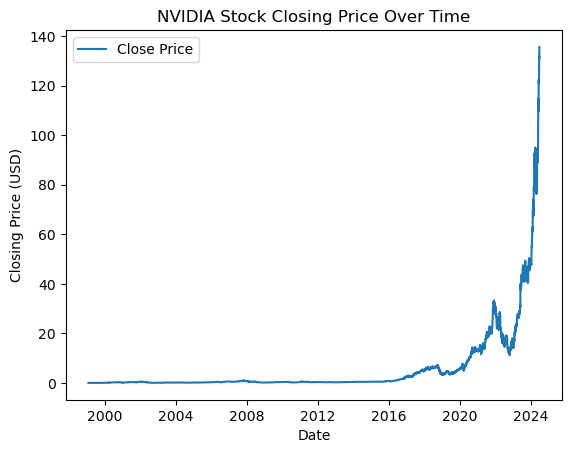

In [19]:
df.describe()
plt.plot(df['Close'],label='Close Price')
plt.title('NVIDIA Stock Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.legend()
plt.show()

In [20]:
#Trend Analysis

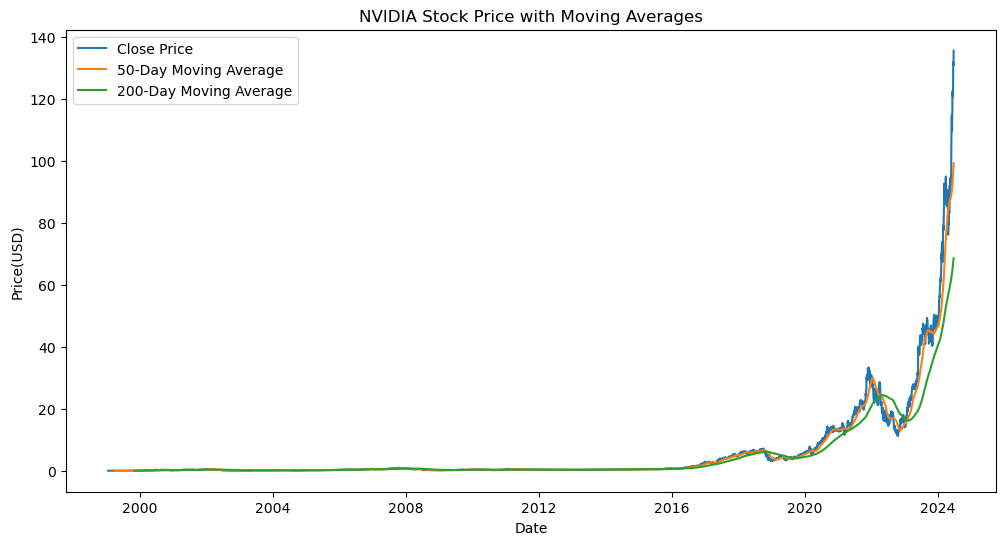

In [21]:
#calculating Movoing averages
df['MA50']=df['Close'].rolling(window=50).mean()
df['MA200']=df['Close'].rolling(window=200).mean()
# Plot closing price and moving averages
plt.figure(figsize=(12,6))

plt.plot(df['Close'],label='Close Price')
plt.plot(df['MA50'],label='50-Day Moving Average')
plt.plot(df['MA200'],label='200-Day Moving Average')
plt.title('NVIDIA Stock Price with Moving Averages')
plt.ylabel('Price(USD)')
plt.xlabel('Date')
plt.legend()
plt.show()

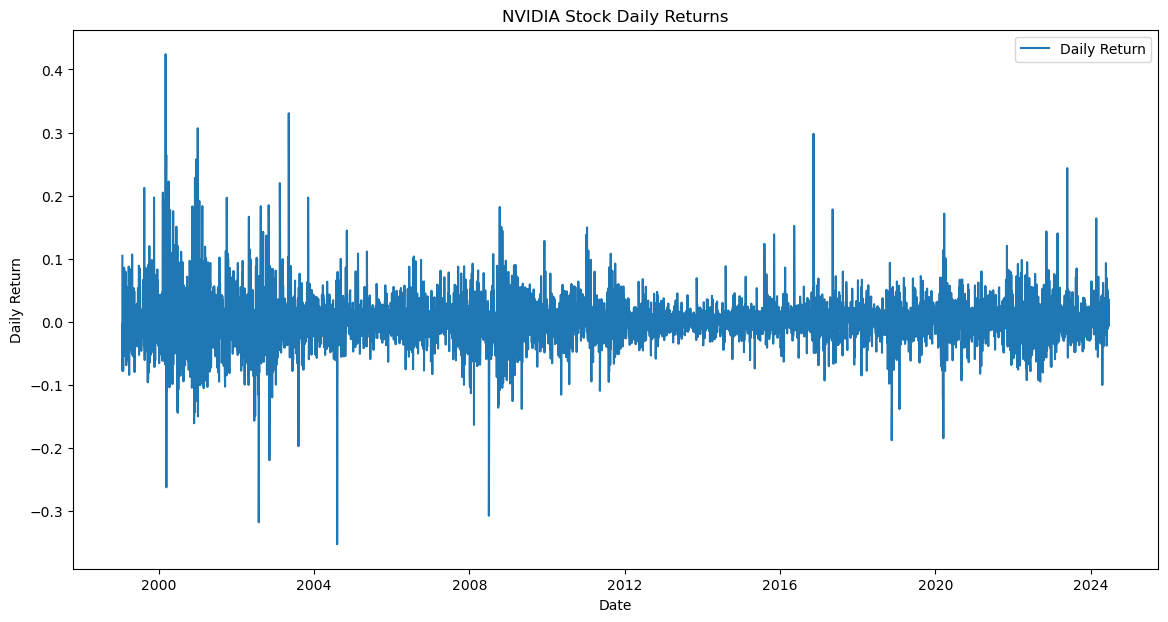

In [22]:
#Volatility Analysis
#Measure the stock's volatility:
df['Daily Return']=df['Close'].pct_change()

# Plot the daily return
plt.figure(figsize=(14,7))
plt.plot(df['Daily Return'],label='Daily Return')
plt.title('NVIDIA Stock Daily Returns')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.legend()
plt.show()

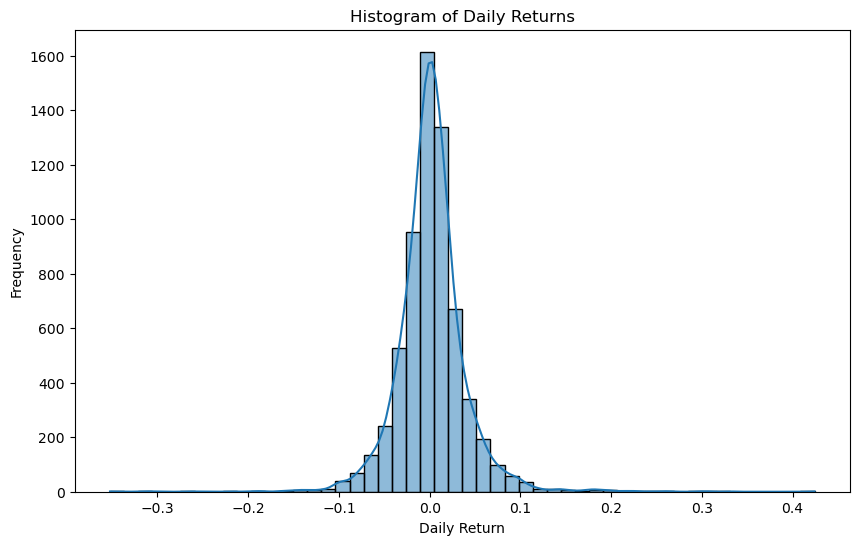

In [23]:
## Plot histogram of daily returns
plt.figure(figsize=(10,6))
sns.histplot(df['Daily Return'].dropna(),bins=50,kde=True)
plt.title('Histogram of Daily Returns')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.show()

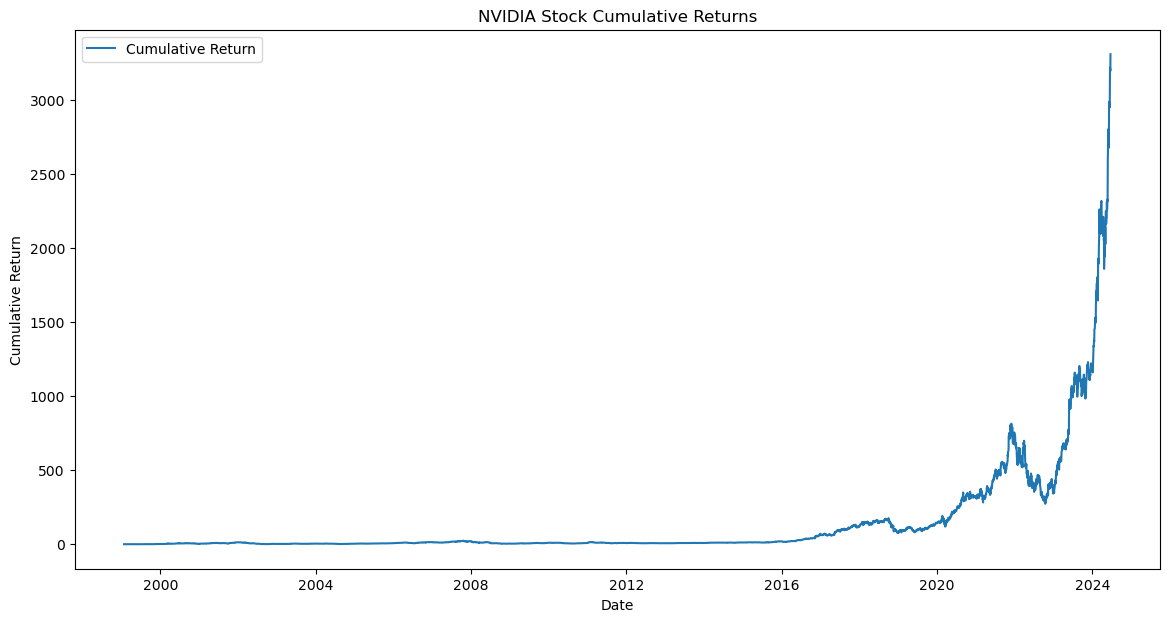

In [24]:
#Calculating and Plotting Key Metrics
#Calculate metrics like cumulative returns and volatility:

df['Cumulative Return'] = (1 + df['Daily Return']).cumprod()

# Plot cumulative returns

plt.figure(figsize=(14,7))
plt.plot(df['Cumulative Return'], label = 'Cumulative Return')
plt.title('NVIDIA Stock Cumulative Returns')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.show()

In [25]:
from sklearn.model_selection import train_test_split

In [27]:
from sklearn.preprocessing import MinMaxScaler

In [30]:
# Create lag features (e.g., previous day's closing price)
df['Close_Lag1'] = df['Close'].shift(1)
df['Close_Lag2'] = df['Close'].shift(2)
df['Close_Lag3'] = df['Close'].shift(3)
df['Close_Lag7'] = df['Close'].shift(7)


In [31]:
# Drop rows with missing values created by shifting
df.dropna(inplace = True)

In [33]:
# Define features and target variable
features = ['Close_Lag1','Close_Lag2', 'Close_Lag3','Close_Lag7']
target = ['Close']

In [36]:
# Split the data into training and testing sets
X = df[features]
y = df[target]

In [37]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [39]:
# Scale the features
scaler = MinMaxScaler()

In [44]:
X_train_scaled = scaler.fit_transform(X_train)

In [46]:
X_test_scaled = scaler.transform(X_test)

In [54]:
#Linear Regression
#Implement a basic linear regression model.
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , r2_score

In [ ]:
# Train the model

In [49]:
model = LinearRegression()

In [53]:
model.fit(X_train_scaled,y_train)

LinearRegression()

In [55]:
# Make predictions

In [56]:
y_pred_train = model.predict(X_train_scaled)
y_pred_test = model.predict(X_test_scaled)

In [58]:
# Evaluate the model
print(f'Training RMSE: {np.sqrt(mean_squared_error(y_train, y_pred_train))}')
print(f'Testing RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_test))}')
print(f'Testing R^2: {r2_score(y_test, y_pred_test)}')

Training RMSE: 0.46185913737357004
Testing RMSE: 0.5013917516176601
Testing R^2: 0.9987992127038482


In [59]:
#Random Forest Regression
from sklearn.ensemble import RandomForestRegressor

In [61]:
rf = RandomForestRegressor(n_estimators=100,random_state=42)

In [62]:
rf.fit(X_train_scaled,y_train)

C:\Users\Princ\AppData\Local\Temp\ipykernel_2060\2856705969.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train_scaled,y_train)


RandomForestRegressor(random_state=42)

In [65]:
# Make predictions
y_pred_train_rf = rf.predict(X_train_scaled)
y_pred_test_rf = rf.predict(X_test_scaled)

In [67]:
# Evaluate the model
print(f'Testing RMSE : {np.sqrt(mean_squared_error(y_train,y_pred_train))}')
print(f'Testing RMSE : {np.sqrt(mean_squared_error(y_test,y_pred_test))}')
print(f'Testing R^2: {r2_score(y_test,y_pred_test)}')

Testing RMSE : 0.46185913737357004
Testing RMSE : 0.5013917516176601
Testing R^2: 0.9987992127038482


In [68]:
import tensorflow as tf

In [72]:
from tensorflow.keras.models import Sequential

In [73]:
from tensorflow.keras.layers import LSTM , Dense

In [74]:
# Prepare data for LSTM (Long Short Term Memory)(reshaping)

In [82]:
X_train_lstm  = X_train_scaled.reshape((X_train_scaled.shape[0],X_train_scaled.shape[1],1))
X_test_lstm = X_test_scaled.reshape((X_test_scaled.shape[0],X_test_scaled.shape[1],1))

In [83]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train_lstm.shape[1], 1)))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [89]:
history = model.fit(X_train_lstm, y_train, epochs=50, batch_size=32, validation_data=(X_test_lstm, y_test), verbose=1)


Epoch 1/50
130/130 [==============================] - 1s 7ms/step - loss: 0.3724 - val_loss: 0.3105
Epoch 2/50
130/130 [==============================] - 1s 7ms/step - loss: 0.3397 - val_loss: 0.2858
Epoch 3/50
130/130 [==============================] - 1s 6ms/step - loss: 0.3467 - val_loss: 0.4232
Epoch 4/50
130/130 [==============================] - 1s 7ms/step - loss: 0.3588 - val_loss: 0.2857
Epoch 5/50
130/130 [==============================] - 1s 6ms/step - loss: 0.3940 - val_loss: 0.3454
Epoch 6/50
130/130 [==============================] - 1s 6ms/step - loss: 0.3652 - val_loss: 0.3421
Epoch 7/50
130/130 [==============================] - 1s 7ms/step - loss: 0.3281 - val_loss: 0.3113
Epoch 8/50
130/130 [==============================] - 1s 9ms/step - loss: 0.3094 - val_loss: 0.3321
Epoch 9/50
130/130 [==============================] - 1s 10ms/step - loss: 0.3284 - val_loss: 0.3493
Epoch 10/50
130/130 [==============================] - 2s 13ms/step - loss: 0.2972 - val_loss: 0.31

In [87]:
# Make predictions
y_pred_train_lstm = model.predict(X_train_lstm)
y_pred_test_lstm = model.predict(X_test_lstm)

64/64 [==============================] - 0s 2ms/step


In [88]:
# Evaluate the model
print(f'Training RMSE: {np.sqrt(mean_squared_error(y_train, y_pred_train_lstm))}')
print(f'Testing RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_test_lstm))}')

Training RMSE: 0.6273227050180957
Testing RMSE: 0.6270579901700937


In [93]:
# Compare RMSE and R^2 of different models
train_rmse = [np.sqrt(mean_squared_error(y_train,y_pred_train)),
             np.sqrt(mean_squared_error(y_train,y_pred_train_rf)),
             np.sqrt(mean_squared_error(y_train,y_pred_train_lstm))]
test_rmse = [np.sqrt(mean_squared_error(y_test,y_pred_test)),
            np.sqrt(mean_squared_error(y_test,y_pred_test_rf)),
            np.sqrt(mean_squared_error(y_test,y_pred_test_lstm))]
test_r2 = [r2_score(y_test,y_pred_test),
          r2_score(y_test,y_pred_test_rf),
          r2_score(y_test,y_pred_test_lstm)]

In [105]:
for i, model in enumerate(models):
    print(f"{models}:")
    print(f"  Training RMSE: {train_rmse[i]}")
    print(f"  Testing RMSE: {test_rmse[i]}")
    print(f"  Testing R^2: {test_r2[i]}\n")

NameError: name 'models' is not defined

In [99]:
#Visualization of Predictions

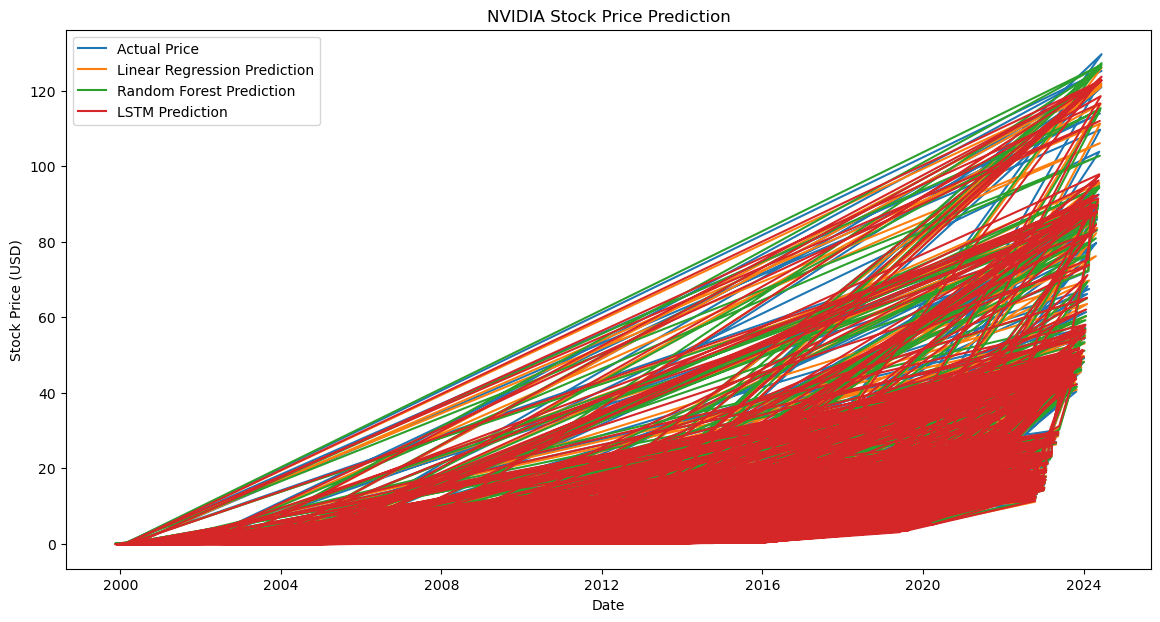

In [106]:
plt.figure(figsize=(14, 7))
plt.plot(y_test.index, y_test, label='Actual Price')
plt.plot(y_test.index, y_pred_test, label='Linear Regression Prediction')
plt.plot(y_test.index, y_pred_test_rf, label='Random Forest Prediction')
plt.plot(y_test.index, y_pred_test_lstm, label='LSTM Prediction')
plt.title('NVIDIA Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Stock Price (USD)')
plt.legend()
plt.show()